saja abed elhadi-207660549

Polina Naumova -336493143

Misk Naser -315228841




***The data consists of features of real estate in different areas of Bangalore.***

### Variables:


**• availability:**

is the property available immediately (1) or in the near future (0).
_______________________________________________________________________________

**• total_sqft:**

the area of the property in square feet (1 foot = 30.54 cm).
_______________________________________________________________________________

**• bedrooms:**

the number of bedrooms in the property.
_______________________________________________________________________________

**• bath:**

the number of bathrooms in the property.
_______________________________________________________________________________

**• balcony:**

the number of balconies in the property.
_______________________________________________________________________________

**• rank:**

the ranking of the neighborhood in terms of average price (1 is
the highest).
_______________________________________________________________________________

**• area_type:**

is the property type a built up area (B) or plot area (P).
_______________________________________________________________________________

**• price in rupees:**

the price of the property.
_______________________________________________________________________________


### Regression:



**We want to Use the relevant models for Statistical learning to predict the price of a property using the relevant features in the dataset.**

# Importing the basic librarires

In [359]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

# -----------------------------------------------------------------
# 1. Data Exploration and Data Preprocessing
# -----------------------------------------------------------------

#### Importing the dataset


In [446]:
df = pd.read_csv('BHP.csv')

original_df = df.copy(deep=True)

df.head()

print('The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))


The Datset consists of 9 features & 13320 samples.


#### Checking the dtypes of all the columns

In [447]:
df.info()

print('It is clearly visible that almost half of the values are missing in the society column.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
It is clearly visible that almost half of the values are missing in the society column.


#### Check for empty elements


In [448]:
nvc = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
print(nvc)

              Total Null Values  Percentage
area_type                     0    0.000000
availability                  0    0.000000
location                      1    0.007508
size                         16    0.120120
society                    5502   41.306306
total_sqft                    0    0.000000
bath                         73    0.548048
balcony                     609    4.572072
price                         0    0.000000


**since the society column is missing 41% of the data, we decided not to use it**
#### remove the society column

In [449]:
df = df.drop(['society'],axis = 1)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


#### delete the missing rows in other column

In [450]:
df = df.dropna (subset=['balcony'])
df = df.dropna (subset=['size'])
df = df.dropna (subset=['bath'])
df = df.dropna (subset=['location'])
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


#### Check for empty elements again


In [451]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

### care of categorical features


In [452]:
cleanup_nums = {"area_type": {"Super built-up  Area": 1, 
                              "Plot  Area": 0, 
                              "Built-up  Area": 1,
                              "Carpet  Area": 1},
                "size": {"1 BHK": 1, "1 Bedroom": 1,
                         "2 BHK": 2, "2 Bedroom": 2,
                         "3 BHK": 3, "3 Bedroom": 3,
                         "4 BHK": 4, "4 Bedroom": 4,
                         "5 BHK": 5, "5 Bedroom": 5,
                         "6 BHK": 6, "6 Bedroom": 6,
                         "7 BHK": 7, "7 Bedroom": 7,
                         "8 BHK": 8, "8 Bedroom": 8,
                         "9 BHK": 9, "9 Bedroom": 9},
                "availability": {"Ready To Move": 1, 
                              "Immediate Possession": 1}
                }
df = df.replace(cleanup_nums)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,19-Dec,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,0,1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,1,1,Uttarahalli,3,1440,2.0,3.0,62.00
3,1,1,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,1,1,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,1,1,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,1,1,Whitefield,5,3453,4.0,0.0,231.00
13317,1,1,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,1,18-Jun,Padmanabhanagar,4,4689,4.0,1.0,488.00


### replace the values: 1 - available, 0 - not available (for all others)


In [453]:
df['availability'] = pd.to_numeric(df['availability'], errors='coerce', downcast='integer')
df['availability'] = df['availability'].fillna(0)
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,0.0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,0,1.0,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,1,1.0,Uttarahalli,3,1440,2.0,3.0,62.00
3,1,1.0,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,1,1.0,Kothanur,2,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,1,1.0,Green Glen Layout,3,1715,3.0,3.0,112.00
13315,1,1.0,Whitefield,5,3453,4.0,0.0,231.00
13317,1,1.0,Raja Rajeshwari Nagar,2,1141,2.0,1.0,60.00
13318,1,0.0,Padmanabhanagar,4,4689,4.0,1.0,488.00


### convert to int column size and remove all values that are not numeric


In [454]:
df['size'] = pd.to_numeric(df['size'], errors='coerce', downcast='integer')
df = df.dropna (subset=['size'])
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,0.0,Electronic City Phase II,2.0,1056,2.0,1.0,39.07
1,0,1.0,Chikka Tirupathi,4.0,2600,5.0,3.0,120.00
2,1,1.0,Uttarahalli,3.0,1440,2.0,3.0,62.00
3,1,1.0,Lingadheeranahalli,3.0,1521,3.0,1.0,95.00
4,1,1.0,Kothanur,2.0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,1,1.0,Green Glen Layout,3.0,1715,3.0,3.0,112.00
13315,1,1.0,Whitefield,5.0,3453,4.0,0.0,231.00
13317,1,1.0,Raja Rajeshwari Nagar,2.0,1141,2.0,1.0,60.00
13318,1,0.0,Padmanabhanagar,4.0,4689,4.0,1.0,488.00


In [455]:
#convert to int column total_sqft and remove all values that are not numeric


In [456]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce', downcast='integer')
df = df.dropna (subset=['total_sqft'])
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,1,0.0,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,0,1.0,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,1,1.0,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,1,1.0,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,1,1.0,Kothanur,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13314,1,1.0,Green Glen Layout,3.0,1715.0,3.0,3.0,112.00
13315,1,1.0,Whitefield,5.0,3453.0,4.0,0.0,231.00
13317,1,1.0,Raja Rajeshwari Nagar,2.0,1141.0,2.0,1.0,60.00
13318,1,0.0,Padmanabhanagar,4.0,4689.0,4.0,1.0,488.00


In [457]:
df.nunique().sort_values()['location']

1245

**because location a categorical value and have many different Possible values
and its hard to handle all of locations so we decide not to use to 
predict house price**

In [458]:
df = df.drop(['location'],axis = 1) 
df

,area_type,availability,size,total_sqft,bath,balcony,price
0,1,0.0,2.0,1056.0,2.0,1.0,39.07
1,0,1.0,4.0,2600.0,5.0,3.0,120.00
2,1,1.0,3.0,1440.0,2.0,3.0,62.00
3,1,1.0,3.0,1521.0,3.0,1.0,95.00
4,1,1.0,2.0,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13314,1,1.0,3.0,1715.0,3.0,3.0,112.00
13315,1,1.0,5.0,3453.0,4.0,0.0,231.00
13317,1,1.0,2.0,1141.0,2.0,1.0,60.00
13318,1,0.0,4.0,4689.0,4.0,1.0,488.00


In [459]:
df.nunique().sort_values()

area_type          2
availability       2
balcony            4
size               9
bath              11
total_sqft      1801
price           1804
dtype: int64

# ------------------------------------------------------
# 2. Exploratory Data Analysis (EDA)
# ------------------------------------------------------

### Let us first analyze the distribution of the target variable


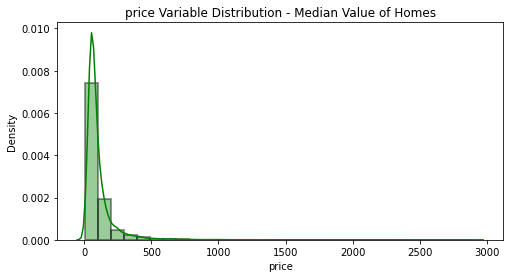

In [460]:
target = 'price'
features = [i for i in df.columns if i not in [target]]

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('price Variable Distribution - Median Value of Homes')
plt.show()



**does not look good, we will come back to this after we check other variables**


### Check numerical & categorical features


In [461]:
nu = df[features].nunique().sort_values()
nf = [];#numircal_features
cf = [];#categorical_features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16: cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


The Datset has 1 numerical & 5 categorical features.


### Visualising the numeric features 


                                   Numeric Features Distribution                                    


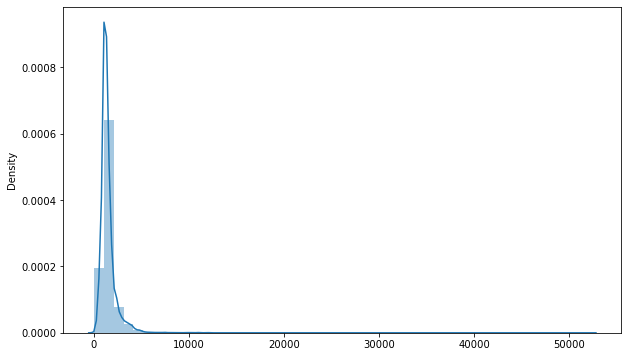

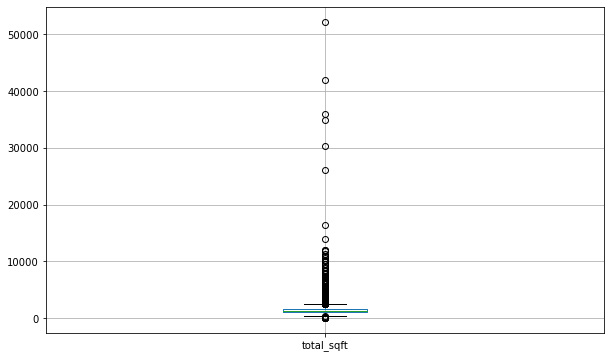

In [462]:
print('Numeric Features Distribution'.center(100))

sns.distplot(df[nf])
plt.show()

df.boxplot(nf)
plt.show()

**There seem to be some outliers..
now we try to  fix it as possiable**


### Remove the outlier:

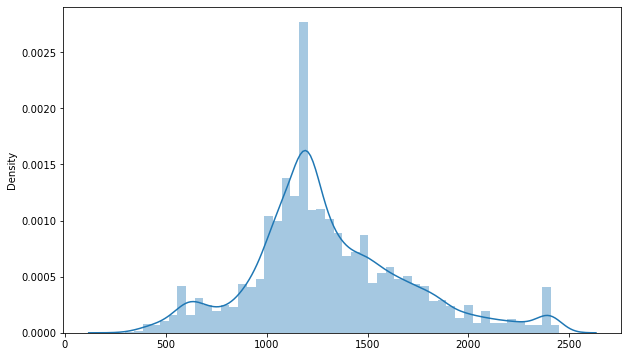

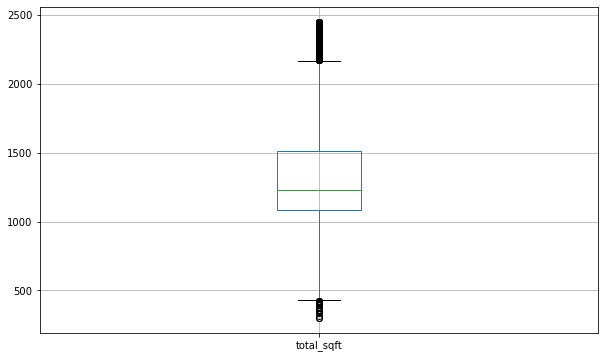

In [463]:
df1 = df.copy()
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
    
df1.head()

sns.distplot(df1[nf])
plt.show()

df1.boxplot(nf)
plt.show()

df = df1.copy()


#### Visualising the categorical features 


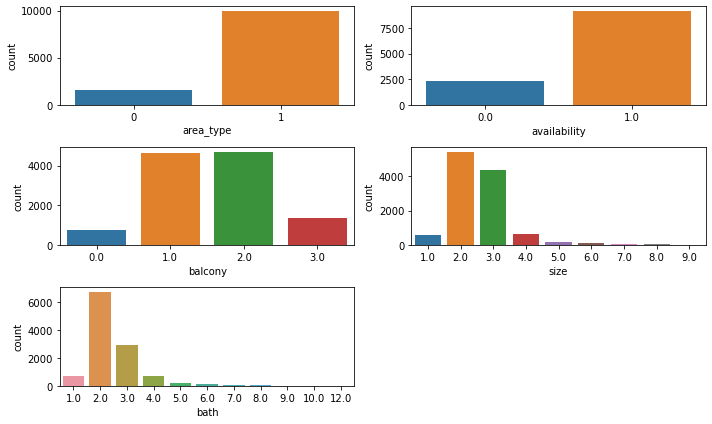

In [585]:
for i in range(len(cf)):
        plt.subplot(3,2,i+1)
        sns.countplot(df[cf[i]])
        plt.tight_layout()

plt.show()

#### analyze the distribution of the target variable and see the differences


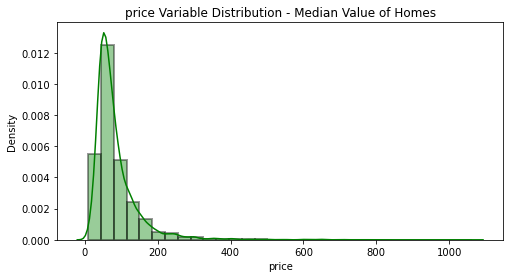

In [465]:
target = 'price'
features = [i for i in df.columns if i not in [target]]

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('price Variable Distribution - Median Value of Homes')
plt.show()



## looks better,more like a normal distribution.
 

#### Understanding the relationship between all the features


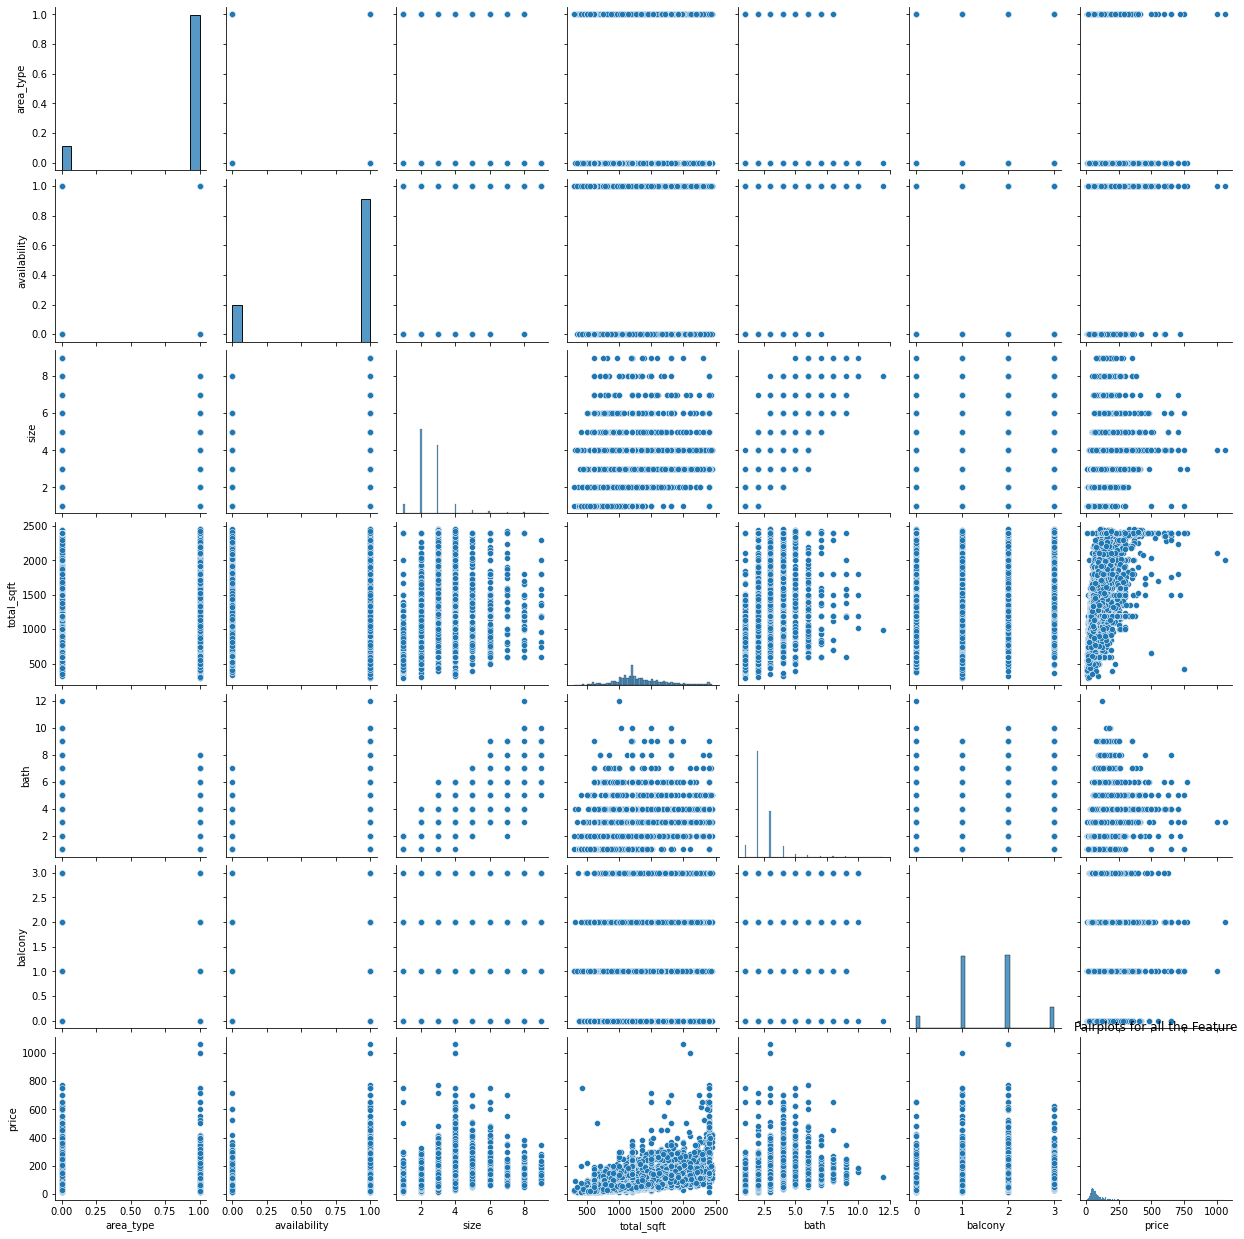

In [466]:
sns.pairplot(df)
plt.title('Pairplots for all the Feature')
plt.show()

#### We can notice that some features have linear relationship

# ------------------------------------------------------
# 3. Data Manipulation
# ------------------------------------------------------

### Splitting the data intro training & testing sets (80% X 20%)


In [467]:
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.80, test_size=0.20)

Train_X.reset_index(drop=True,inplace=True)

print('Original set  --->', X.shape,Y.shape)

print('Training set  --->', Train_X.shape,Train_Y.shape)

print('Testing set   --->', Test_X.shape, Test_Y.shape)



Original set  ---> (11475, 6) (11475,)
Training set  ---> (9180, 6) (9180,)
Testing set   ---> (2295, 6) (2295,)


### Feature Scaling (Standardization)


In [468]:
std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
#display(Train_X_std.describe())

Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
#display(Test_X_std.describe())


# ------------------------------------------------------
# 4. Feature Selection/Extraction
# ------------------------------------------------------

#### Checking the correlation


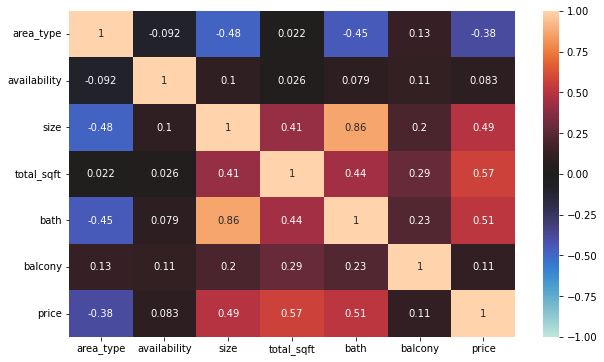

In [469]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()


# ------------------------------------------------------
# 5. Predictive Modelling REGRESSION
# ------------------------------------------------------


#### Define a function to evaluate our models


In [470]:
Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([4,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
def Evaluate(n, pred1,pred2):
    
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
        plt.show()

        
#Evaluating the Multiple Linear Regression Model
#train set output
    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --------->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))
    
    
#test set output
    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --------->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    
    
#table    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

### 5.1 Multiple Linear Regression(MLR)


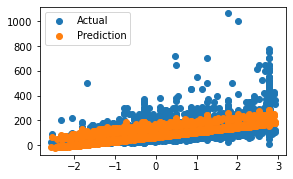



--------------------Training Set Metrics--------------------

R2-Score on Training set ---------> 0.4889566131937069
Residual Sum of Squares (RSS) on Training set  ---> 19133053.08206106
Mean Squared Error (MSE) on Training set       ---> 2084.210575387915
Root Mean Squared Error (RMSE) on Training set ---> 45.65315515260599

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---------> 0.4941930459940317
Residual Sum of Squares (RSS) on Training set  ---> 5527213.008551636
Mean Squared Error (MSE) on Training set       ---> 2408.3716812861157
Root Mean Squared Error (RMSE) on Training set ---> 49.07516358898985


In [471]:

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)


Evaluate(0, pred1, pred2)


### 5.2 Ridge Regression Model


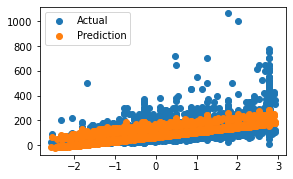



--------------------Training Set Metrics--------------------

R2-Score on Training set ---------> 0.4889566060629871
Residual Sum of Squares (RSS) on Training set  ---> 19133053.349029474
Mean Squared Error (MSE) on Training set       ---> 2084.2106044694415
Root Mean Squared Error (RMSE) on Training set ---> 45.6531554711111

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---------> 0.4941902705395427
Residual Sum of Squares (RSS) on Training set  ---> 5527243.337371821
Mean Squared Error (MSE) on Training set       ---> 2408.3848964583094
Root Mean Squared Error (RMSE) on Training set ---> 49.07529823096655


In [472]:
RLR = Ridge().fit(Train_X_std,Train_Y)

pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)


Evaluate(1, pred1, pred2)


### 5.3 Lasso Regression Model


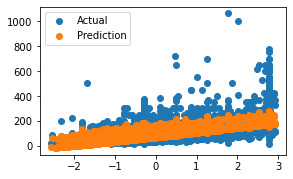



--------------------Training Set Metrics--------------------

R2-Score on Training set ---------> 0.48778922911113776
Residual Sum of Squares (RSS) on Training set  ---> 19176759.002528075
Mean Squared Error (MSE) on Training set       ---> 2088.9715689028403
Root Mean Squared Error (RMSE) on Training set ---> 45.7052685026884

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---------> 0.4915743461249906
Residual Sum of Squares (RSS) on Training set  ---> 5555828.89029668
Mean Squared Error (MSE) on Training set       ---> 2420.840475074806
Root Mean Squared Error (RMSE) on Training set ---> 49.20203730614014


In [473]:
LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)


Evaluate(2, pred1, pred2)

### 5.4 Polynomial Regression Model


### Checking polynomial regression performance on various degrees


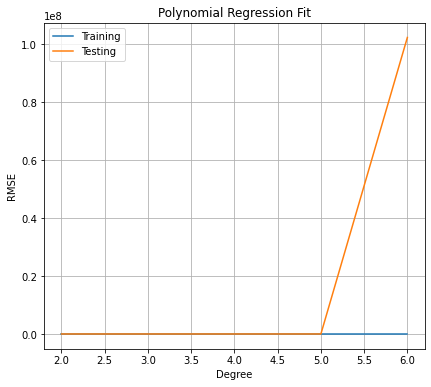

In [630]:
Trr=[]; Tss=[]
n_degree=7

for i in range(2,n_degree):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()

plt.show()

#### Using the 5th Order Polynomial Regression model (degree=5)


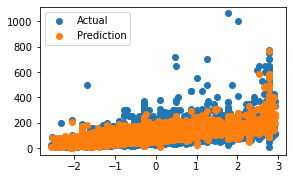



--------------------Training Set Metrics--------------------

R2-Score on Training set ---------> 0.6277145609467341
Residual Sum of Squares (RSS) on Training set  ---> 13938067.199340252
Mean Squared Error (MSE) on Training set       ---> 1518.307973784341
Root Mean Squared Error (RMSE) on Training set ---> 38.96547155860353

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---------> -5.873154331982247
Residual Sum of Squares (RSS) on Training set  ---> 75106496.12987931
Mean Squared Error (MSE) on Training set       ---> 32726.142104522576
Root Mean Squared Error (RMSE) on Training set ---> 180.90368184346767


In [475]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)


Evaluate(3, pred1, pred2)

### 5.5 Decision Trees ,Regression Tree


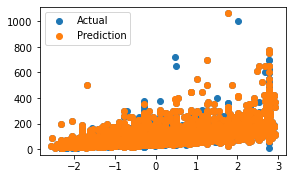



--------------------Training Set Metrics--------------------

R2-Score on Training set ---------> 0.8707878042115688
Residual Sum of Squares (RSS) on Training set  ---> 4837600.612189893
Mean Squared Error (MSE) on Training set       ---> 526.971744247265
Root Mean Squared Error (RMSE) on Training set ---> 22.95586513828797

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---------> 0.43493326611126987
Residual Sum of Squares (RSS) on Training set  ---> 6174775.13409735
Mean Squared Error (MSE) on Training set       ---> 2690.533827493399
Root Mean Squared Error (RMSE) on Training set ---> 51.8703559607354


In [477]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

MLR = regressor.fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)


Evaluate(4, pred1, pred2)


### 5.6 Random Forest Regressor


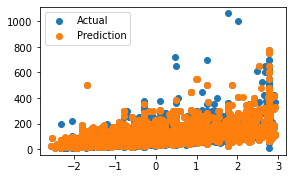



--------------------Training Set Metrics--------------------

R2-Score on Training set ---------> 0.6440366594175801
Residual Sum of Squares (RSS) on Training set  ---> 13326980.969646612
Mean Squared Error (MSE) on Training set       ---> 1451.7408463667334
Root Mean Squared Error (RMSE) on Training set ---> 38.10171710522681

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---------> 0.4258692020094401
Residual Sum of Squares (RSS) on Training set  ---> 6273822.829304379
Mean Squared Error (MSE) on Training set       ---> 2733.691864620644
Root Mean Squared Error (RMSE) on Training set ---> 52.284719226755385


In [478]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 1, random_state = 0)

MLR = regressor.fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)


Evaluate(5, pred1, pred2)

### 5.7 SVM Regressor


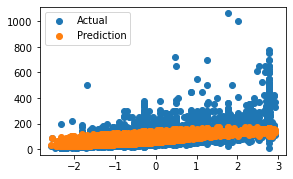



--------------------Training Set Metrics--------------------

R2-Score on Training set ---------> 0.4159289882865798
Residual Sum of Squares (RSS) on Training set  ---> 21867148.581343044
Mean Squared Error (MSE) on Training set       ---> 2382.042329122336
Root Mean Squared Error (RMSE) on Training set ---> 48.80617101476346

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---------> 0.38423998367561324
Residual Sum of Squares (RSS) on Training set  ---> 6728726.731451697
Mean Squared Error (MSE) on Training set       ---> 2931.9070725279726
Root Mean Squared Error (RMSE) on Training set ---> 54.147087387300644


In [479]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

MLR = regressor.fit(Train_X_std,Train_Y)

pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)


Evaluate(6, pred1, pred2)


###  Comparing the Evaluation Metircs of the Models
### Regression Models Results 


In [590]:
type(EMC)

pandas.core.frame.DataFrame

In [599]:
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)',
             'Ridge Linear Regression (RLR)',
             'Lasso Linear Regression (LLR)',
             'Polynomial Regression (PNR)','Decision Tree Regressor','Random Forest Regressor','SVM Regressor']
df_EMC= pd.DataFrame(EMC)
df_EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.488957,0.494193,1.913305e+07,5.527213e+06,2084.210575,2408.371681,45.653155,49.075164
Ridge Linear Regression (RLR),0.488957,0.494190,1.913305e+07,5.527243e+06,2084.210604,2408.384896,45.653155,49.075298
Lasso Linear Regression (LLR),0.487789,0.491574,1.917676e+07,5.555829e+06,2088.971569,2420.840475,45.705269,49.202037
Polynomial Regression (PNR),0.627715,-5.873154,1.393807e+07,7.510650e+07,1518.307974,32726.142105,38.965472,180.903682
Decision Tree Regressor,0.870788,0.434933,4.837601e+06,6.174775e+06,526.971744,2690.533827,22.955865,51.870356
Random Forest Regressor,0.644037,0.425869,1.332698e+07,6.273823e+06,1451.740846,2733.691865,38.101717,52.284719
SVM Regressor,0.415929,0.384240,2.186715e+07,6.728727e+06,2382.042329,2931.907073,48.806171,54.147087


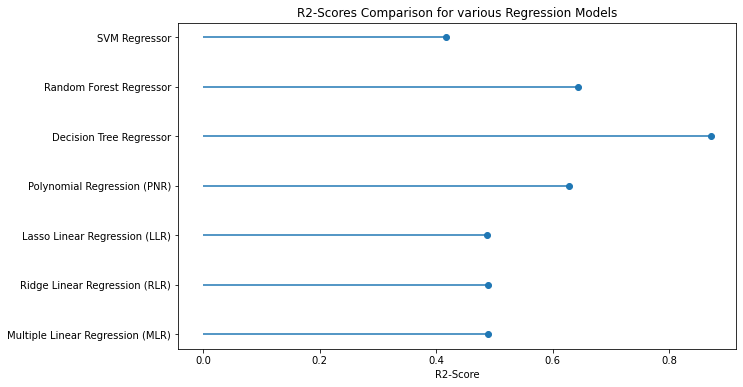

In [494]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Train-R2']
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
plt.show()


### From the above plot, it is clear that the decision tree regressor model have the highest explainability power to understand the dataset.

#### but we also need to check the RMSE and its differences in test and training data to avoid overfitting:


### Root Mean SquaredError Comparison for different Regression Models


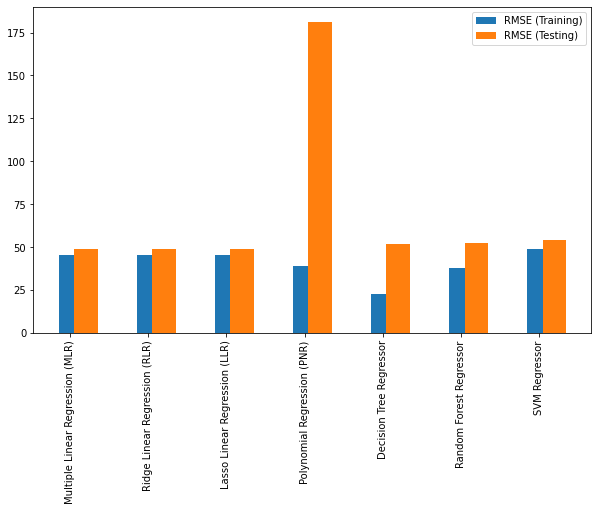

In [625]:
cc = Model_Evaluation_Comparison_Matrix.columns.values
plt.bar(np.arange(7), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(7)+0.2 , Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(7),EMC.index, rotation =90)
plt.legend()
plt.show()


**Lesser the RMSE, better the model. Also, provided the model should have close proximity with the training & testing scores.
For this problem, it is can be said that polynomial regressions clearly overfitting. Unfortunately the tree model from the previous point is overfitting, as is the random forest.
All other models are very close to each other.**

In [602]:
EMC.index

Index(['Multiple Linear Regression (MLR)', 'Ridge Linear Regression (RLR)',
       'Lasso Linear Regression (LLR)', 'Polynomial Regression (PNR)',
       'Decision Tree Regressor', 'Random Forest Regressor', 'SVM Regressor'],
      dtype='object')

In [603]:
 #'RMSE (Training)'
Model_Evaluation_Comparison_Matrix[cc[6]]

0    45.653155
1    45.653155
2    45.705269
3    38.965472
4    22.955865
5    38.101717
6    48.806171
Name: Train-RMSE, dtype: float64

In [604]:
#'RMSE (testing)'
Model_Evaluation_Comparison_Matrix[cc[7]]

0     49.075164
1     49.075298
2     49.202037
3    180.903682
4     51.870356
5     52.284719
6     54.147087
Name: Test-RMSE, dtype: float64

In [582]:
Model_Evaluation_Comparison_Matrix[cc[6]]-Model_Evaluation_Comparison_Matrix[cc[7]]

0     -3.422008
1     -3.422143
2     -3.496769
3   -141.938210
4    -28.914491
5    -14.183002
6     -5.340916
dtype: float64

# R^2

In [605]:
Model_Evaluation_Comparison_Matrix[cc[1]]

0    0.494193
1    0.494190
2    0.491574
3   -5.873154
4    0.434933
5    0.425869
6    0.384240
Name: Test-R2, dtype: float64

In [624]:
Model_Evaluation_Comparison_Matrix[cc[1]]

0    0.494193
1    0.494190
2    0.491574
3   -5.873154
4    0.434933
5    0.425869
6    0.384240
Name: Test-R2, dtype: float64

**Multiple Linear Regression (MLR) Model gives slightly better results than the other models**


In [633]:
data = {'models': ['Multiple Linear Regression (MLR)', 'Ridge Linear Regression (RLR)',
       'Lasso Linear Regression (LLR)', 'Polynomial Regression (PNR)',
       'Decision Tree Regressor', 'Random Forest Regressor', 'SVM Regressor'],
        'RMSE (Training)':['45.653155','45.653155','45.705269','38.965472','22.955865','38.101717','48.806171'],
        'RMSE (testing)':['49.075164','49.075298','49.202037','180.903682','51.870356','52.284719','54.147087'],
        'RMSE (diffrence)':['3.422008','-3.422143','-3.496769','-141.938210','-28.914491','-14.183002','-5.340916'],
        'Rsquerd':['0.488957','0.488957','0.487789','0.627715','0.870788','0.644037','0.415929']
        }
dfa = pd.DataFrame(data)
dfa



,models,RMSE (Training),RMSE (testing),RMSE (diffrence),Rsquerd
0,Multiple Linear Regression (MLR),45.653155,49.075164,3.422008,0.488957
1,Ridge Linear Regression (RLR),45.653155,49.075298,-3.422143,0.488957
2,Lasso Linear Regression (LLR),45.705269,49.202037,-3.496769,0.487789
3,Polynomial Regression (PNR),38.965472,180.903682,-141.938210,0.627715
4,Decision Tree Regressor,22.955865,51.870356,-28.914491,0.870788
5,Random Forest Regressor,38.101717,52.284719,-14.183002,0.644037
6,SVM Regressor,48.806171,54.147087,-5.340916,0.415929
